# Pymaceuticals Inc.
---

### Analysis

Comprehensive Analysis of Tumor Volume Data

Data Overview
The dataset comprises tumor volume measurements for mice subjected to various drug regimens, along with demographic variables such as sex, age, and weight. Analyzing these data points is crucial for evaluating treatment efficacy and understanding the biological factors that may influence outcomes.

Summary Statistics
Key summary statistics highlight the average tumor volumes associated with different drug regimens. Capomulinand , Ramicane  emerged as the most effective treatments, characterized by the lowest mean tumor volumes. In contrast, Ketapril  and  Placebo exhibited higher average tumor volumes, indicating lesser efficacy. The close alignment of mean and median values suggests a normal distribution, enhancing the reliability of these metrics. Variability assessments indicate that treatments with higher standard deviations, like Ketapril, reflect inconsistent responses among mice, complicating interpretations of treatment efficacy.

Visualizations
Visualizations are instrumental in interpreting the data. Bar plots comparing mean and median tumor volumes across drug regimens allow for quick visual assessments of treatment effectiveness. Box plots would further illustrate variability and identify potential outliers. For example, an outlier detected in Infubinol raises questions about specific biological responses, indicating a need for deeper investigation into factors contributing to this anomaly.

Statistical Significance
While initial findings suggest differences in treatment effectiveness, formal statistical tests are necessary to confirm these observations. The imbalance in data distribution across drug regimens, reflected in the counts from bar plots, may impact the reliability of statistical analyses, highlighting the importance of balanced sample sizes in future studies.

Gender Distribution Analysis
Analyzing gender distribution through pie charts can reveal the balance within the experimental design. A disproportionate representation of one gender could introduce biases that affect the generalizability of results. If significant skew is identified, adjusting sample sizes in future experiments may be necessary.

Outlier Analysis in Tumor Volume Data
Outliers are pivotal in understanding treatment effectiveness and biological responses. Here’s a breakdown of potential outliers for each drug regimen:

Capomulin: No potential outliers detected. This indicates consistent tumor volume responses, reinforcing Capomulin's effectiveness.
  
Ramicane: Similar to Capomulin, no potential outliers were identified, supporting Ramicane's efficacy through uniformity in tumor volume measurements.

Infubinol: One significant outlier was noted with a tumor volume of approximately 36.32 mm³. This raises several questions:
 Biological Variability: The outlier may reflect a unique biological response, influenced by genetic differences or underlying health conditions.
 Need for Further Investigation: The presence of this outlier warrants further exploration to understand its causes, potentially revealing treatment failures or unique responder profiles.

Ceftamin: No potential outliers found, indicating consistent treatment effects across the cohort.

Implications of Outlier Findings
1. Treatment Effectiveness: The absence of outliers in Capomulin and Ramicane reinforces their status as reliable treatments, while Infubinol's outlier underscores the need for caution in interpreting its inteded results.
   
2. Further Research Directions: The unique case observed in Infubinol should be a focal point for future investigations, potentially leading to new insights about variability in treatment responses and influencing factors.

3. Statistical Integrity: Understanding the presence and implications of outliers is essential for accurately interpreting summary statistics and ensuring that drawn conclusions are valid.

Correlation Assessment
A strong positive correlation (0.84) between mouse weight and average tumor volume suggests that heavier mice tend to have larger tumors. This relationship could inform treatment strategies, particularly regarding dosage adjustments based on weight. However, it is crucial to remember that correlation does not imply causation, necessitating further exploration of underlying factors influencing tumor growth.

Conclusions
This analysis identifies Capomulin as the most effective treatment while highlighting the variability in responses and the importance of considering biological factors in experimental design. The insights gained can guide future research directions, ensuring a comprehensive understanding of treatment efficacy and potential confounding variables. Ultimately, integrating these findings into clinical contexts could enhance treatment strategies and improve outcomes for treating tumors.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
display(combined_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
# Count the number of unique mice by checking the number of unique 'Mouse ID's
num_mice = combined_data['Mouse ID'].nunique()

# Print the number of unique mice
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [59]:
# Identify duplicates
duplicate_mouse_id = 'g989'
duplicate_entries = combined_data[combined_data['Mouse ID'] == duplicate_mouse_id]

# Format output
if not duplicate_entries.empty:
    print(f"Array of duplicate Mouse IDs: {duplicate_entries['Mouse ID'].unique()}")
else:
    print("No duplicates found.")

Array of duplicate Mouse IDs: ['g989']


In [60]:
# Optional: Get all the data for the duplicate mouse ID.
# Identify duplicate Mouse IDs based on 'Mouse ID' and 'Timepoint'
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the list of duplicate Mouse IDs
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Filter the combined_data to get all rows for these duplicate Mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for duplicate Mouse IDs
display(duplicate_mouse_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicates based on 'Mouse ID' and 'Timepoint', keeping only the first occurrence
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the cleaned DataFrame
display(cleaned_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Check the number of unique mice in the cleaned DataFrame
num_cleaned_mice = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice after cleaning: {num_cleaned_mice}")

Number of unique mice after cleaning: 249


## Summary Statistics

In [63]:
# Group by 'Regimen' and calculate the summary statistics for 'Tumor Volume (mm3)'
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume ='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Standard_Deviation='std',
    Tumor_Volume_Std_Err =lambda x: st.sem(x)
).reset_index()

# Display the resulting summary DataFrame
display(summary_stats)

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Standard_Deviation,Tumor_Volume_Std_Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [64]:
# Generate a summary statistic s table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM=lambda x: st.sem(x)
).reset_index()

# Display the resulting summary DataFrame
display(summary_stats)

,Drug Regimen,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

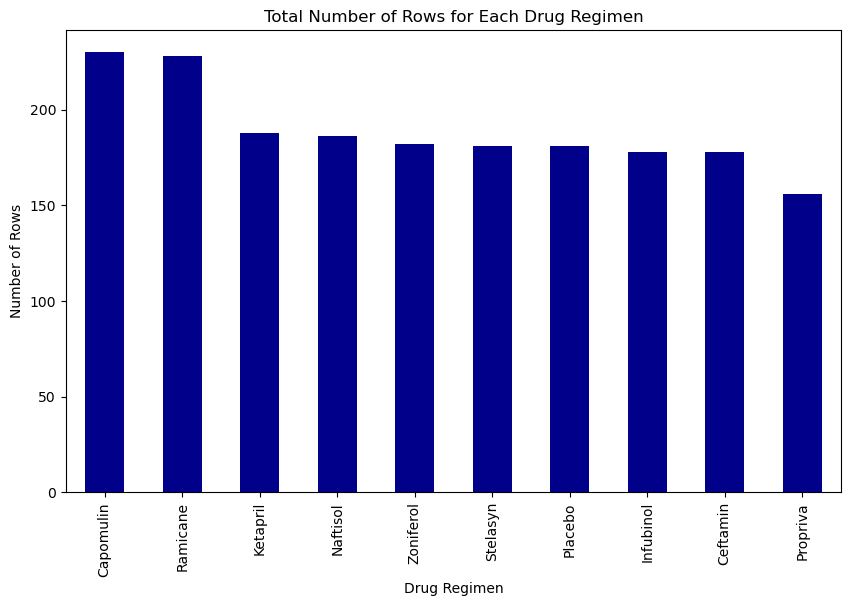

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
regimen_counts.plot(kind='bar', color='darkblue')

# Set plot titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

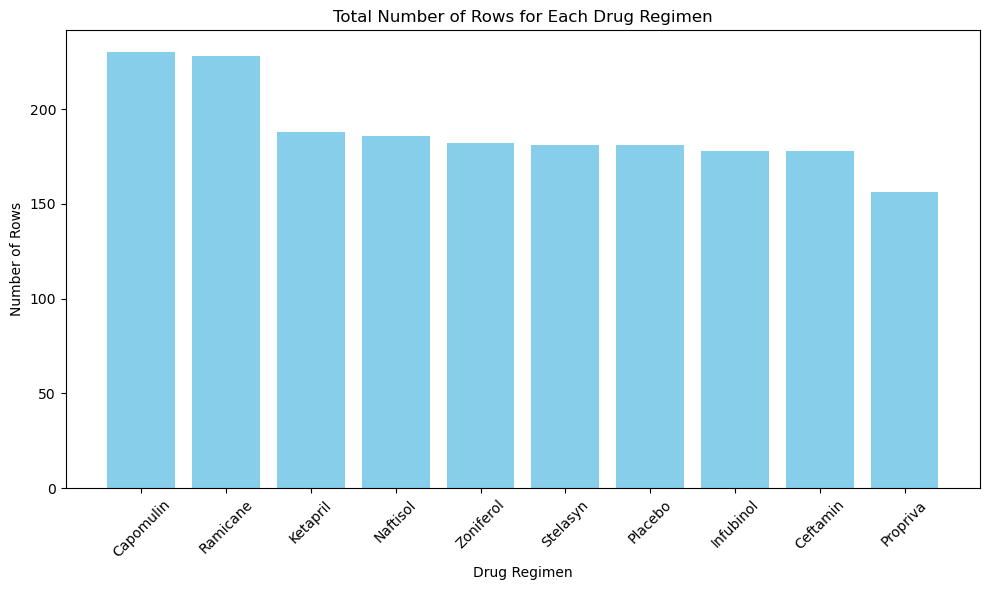

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Set plot titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

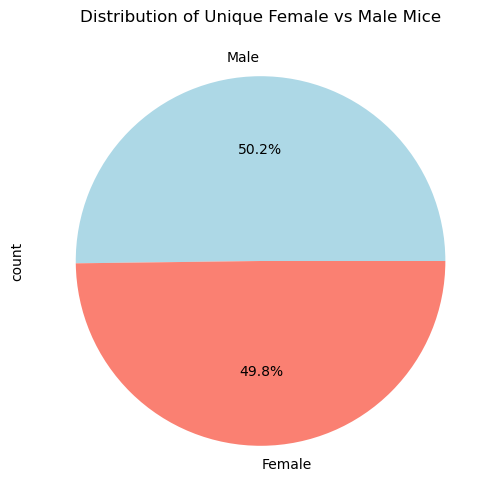

In [67]:
# Get the unique mice with their gender
unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice by gender
sex_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using DataFrame.plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'], figsize=(6, 6), title='Distribution of Unique Female vs Male Mice')

# Display the plot
plt.show()

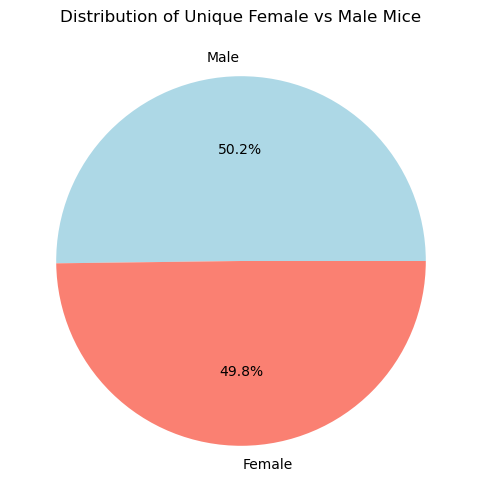

In [68]:
#  Get the unique mice with their gender
unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice by gender
sex_counts = unique_mice['Sex'].value_counts()

# Create the pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])

# Set the title
plt.title('Distribution of Unique Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor=combined_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor=max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data=max_tumor.merge(combined_data, on=['Mouse ID', 'Timepoint'], how="left")


In [70]:
# Put treatments into a list for for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(final_tumor_vol)

    #Determine outlier using upper and lower bounds
    quartiles=final_tumor_vol.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    outliers=final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


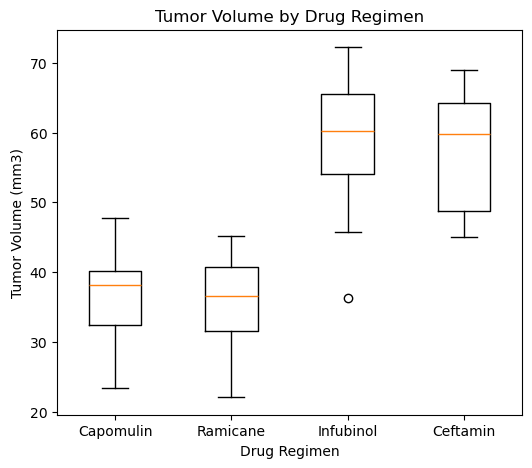

In [71]:
# Prepare data for box plot
plt.figure(figsize=(6, 5))
plt.boxplot(tumor_vol_data, labels=treatments)

# Add titles and labels
plt.title('Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

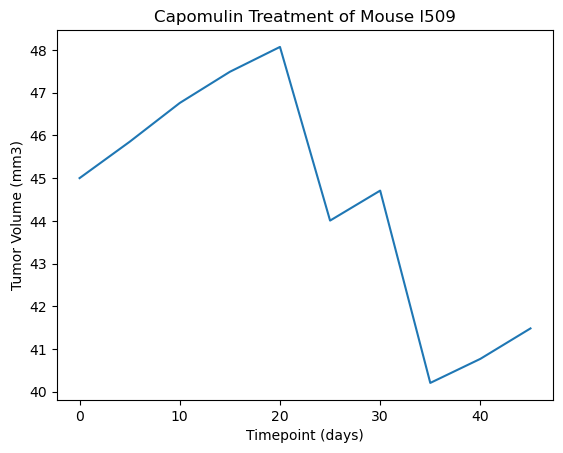

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table=combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
mousedata=capomulin_table.loc[capomulin_table["Mouse ID"] == "l509"]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
# Add titles and labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

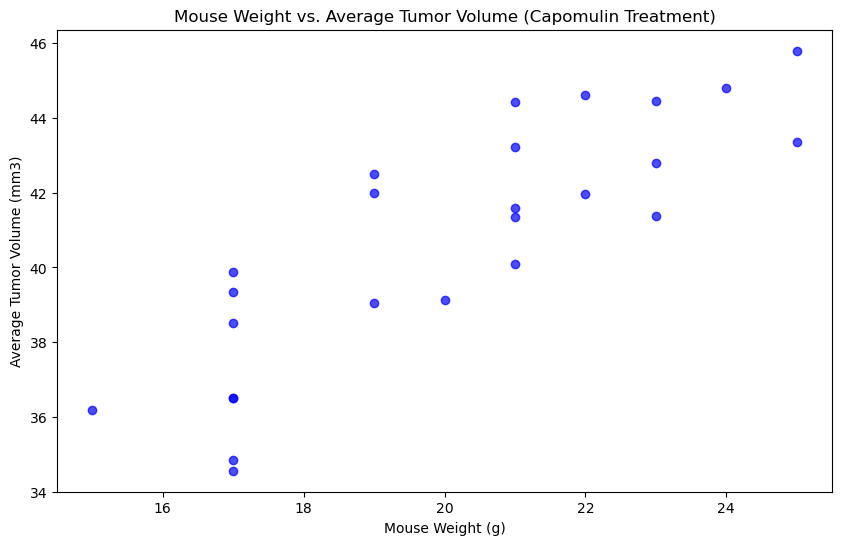

In [73]:
# Filter data for Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Get the mouse weights
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge average tumor volume with mouse weights
merged_data = pd.merge(average_tumor_volume, mouse_weights, on='Mouse ID')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], alpha=0.7, color='blue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
 


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


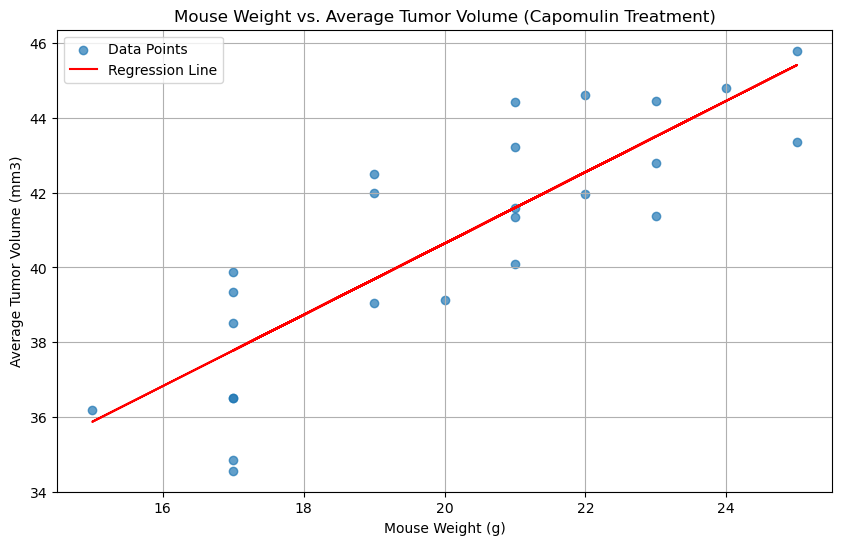

In [74]:
# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Print the linear regression results
#print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_value**2:.2f}")

# Step 6: Create the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], alpha=0.7, label='Data Points')
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Show the plot
plt.show()